Genetic algorithm's flowchart:

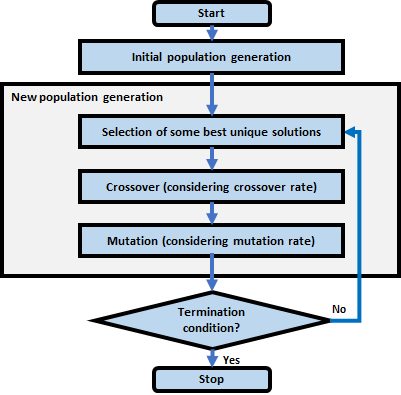


Considered nonlinear objective function:
>$\min f(x)=-(x^2+2)cos(2x) - x^2$

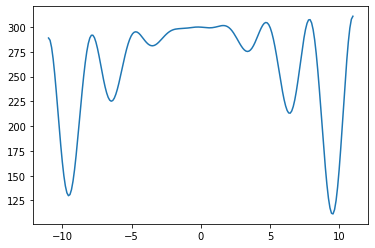

In [1]:
# A. Objective function definition

import numpy as np
import matplotlib.pyplot as plt  # For figure generation
from matplotlib.ticker import FuncFormatter, MaxNLocator  # For figure generation

# Input for figure generation
def fitness(x):
  y = -(x**2+x)*np.cos(2*x) - x**2 + 300
  return y

x = np.linspace(start=-11, stop=11, num=200)
plt.plot(x, fitness(x))

# Objective function
def objective_value_calculation(chromosome):
  objective_value = -(pow(chromosome[0],2)+chromosome[0])*np.cos(2*chromosome[0])-pow(chromosome[0],2)+300
  return objective_value

Program initialization:

In [2]:
# B. Program initialization

import random
random.seed(16)  # Option to fix the random seed (set as comment to produce various random values)
#random.seed(56)
import math

Input data:

(1) Genetic algorithm parameters:

In [3]:
# C. Genetic algorithm parameter setting

population_size = 10
num_of_selected_initial_chromosomes = 6
crossover_rate = 0.8
mutation_rate = 0.2
num_of_population = 10

(2) Define chromosome length (based on the number of decision variables):

In [4]:
# D. Chromosome length determination

chromosome_length = 1

Initial population:

In [5]:
# E. Initial population generation

# Prepare sets for storing best chromosomes and objective values in all populations
best_chromosomes = []
best_objective_values = []


# Generating chromosomes randomly for the initial population
population = []  # Set of chromosomes in a population
objective_value = []  # Set of objective values of chromosomes in a population
for i in range(population_size):
  chromosome = []  # A single chromosome
  for j in range(chromosome_length):
    chromosome += [random.uniform(-11,11)]
  population += [chromosome]
  
  # Calculating objective values of the chromosomes
  objective_value += [objective_value_calculation(chromosome)]

print('initial population:')
for i in range(population_size):
  rounded_value_chromosome = []
  for j in population[i]:
    rounded_value_chromosome += [float("{:.2f}".format(j))] 
  print('chromosome',i,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[i])))


# Find the best solution with the least objective value
min_objective_value =  float('inf')
selected_index = -1
for k in range(population_size):
  if objective_value[k] < min_objective_value:
    min_objective_value = objective_value[k]
    selected_index = k

# Store the best solution and the least objective value
best_chromosomes += [population[selected_index]]
best_objective_values += [objective_value[selected_index]]

initial population:
chromosome 0 =  [-3.05] ; objective_value = 284.60
chromosome 1 =  [-0.43] ; objective_value = 299.98
chromosome 2 =  [-1.83] ; objective_value = 297.98
chromosome 3 =  [-1.17] ; objective_value = 298.77
chromosome 4 =  [-1.99] ; objective_value = 297.35
chromosome 5 =  [3.47] ; objective_value = 275.67
chromosome 6 =  [-5.31] ; objective_value = 280.44
chromosome 7 =  [2.97] ; objective_value = 280.08
chromosome 8 =  [-10.78] ; objective_value = 279.33
chromosome 9 =  [-4.36] ; objective_value = 292.07


In [6]:
# F. Best chromosomes selection (1st population)

print('------------------------------------------------------------------')
print('population 0')
print('------------------------------------------------------------------')

# Store chromosomes and objective_values of current population into prev_population and prev_objective_value
# before performing crossover and mutation operators
prev_population = []
prev_objective_value = []
temp_objective_value = []  # For selecting the best chromosomes before crossover
for j in range(population_size):
  prev_population += [population[j]]
  prev_objective_value += [objective_value[j]]
  temp_objective_value += [objective_value[j]]

# Reset chromosomes and objective_values for the new population
population = []
objective_value = []

# Select best chromosomes
for j in range(num_of_selected_initial_chromosomes):
  min_value = float('inf')
  selected_index = -1
  for k in range(population_size):
    if temp_objective_value[k] < min_value:
      # Skip storing solution if the same solution has been stored before
      same_chromosome = 0
      for l in range(len(objective_value)):
        if temp_objective_value[k] == objective_value[l]:
          same_chromosome = 1
          for m in range(len(population[l])):
            if prev_population[k][m] != population[l][m]:
              same_chromosome = 0
              break
          if same_chromosome == 1:
            break
      if same_chromosome == 1:
        continue
      min_value = temp_objective_value[k]
      selected_index = k
  temp_objective_value[selected_index] = float('inf')
  population += [prev_population[selected_index]]
  objective_value += [prev_objective_value[selected_index]]

print()
print('best chromosomes:')
for i in range(len(population)):
  rounded_value_chromosome = []
  for j in population[i]:
    rounded_value_chromosome += [float("{:.2f}".format(j))] 
  print('chromosome',i,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[i])))

------------------------------------------------------------------
population 0
------------------------------------------------------------------

best chromosomes:
chromosome 0 =  [3.47] ; objective_value = 275.67
chromosome 1 =  [-10.78] ; objective_value = 279.33
chromosome 2 =  [2.97] ; objective_value = 280.08
chromosome 3 =  [-5.31] ; objective_value = 280.44
chromosome 4 =  [-3.05] ; objective_value = 284.60
chromosome 5 =  [-4.36] ; objective_value = 292.07


In [7]:
# G. Crossover operation (1st population)

# Perform crossover if a random value is less than the crossover_rate; otherwise, copy the values from the parents 
while len(population) < population_size:

  child1_chromosome = []
  child2_chromosome = []

  # Set selection probability for each parent
  # Chromosomes with smaller objective value (cost) must have higher selection probability
  total_inverse_of_objective_value = 0
  for j in range(num_of_selected_initial_chromosomes):
    total_inverse_of_objective_value += 1/objective_value[j]
  selection_probability_of_parents = list()
  accumulated_selection_probability_of_parents = list()
  temp_accumulated_value = 0
  for j in range(num_of_selected_initial_chromosomes):
      probability = (1/objective_value[j])/total_inverse_of_objective_value
      selection_probability_of_parents += [probability]
      accumulated_selection_probability_of_parents += [temp_accumulated_value + probability]
      temp_accumulated_value += probability
  accumulated_selection_probability_of_parents[num_of_selected_initial_chromosomes-1] = 1.0
  
  a_random_value = random.random()
  for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
      randomly_selected_parent1_ID = j
      parent1_chromosome = list()
      for k in range(len(population[randomly_selected_parent1_ID])):
          parent1_chromosome += [population[randomly_selected_parent1_ID][k]]
      parent1_objective_values = objective_value[randomly_selected_parent1_ID]
      if a_random_value > accumulated_selection_probability_of_parents[j]:
          break

  same_parent_ID_found = 1
  while same_parent_ID_found == 1:
      a_random_value = random.random()
      for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
          randomly_selected_parent2_ID = j
          parent2_chromosome = list()
          for k in range(len(population[randomly_selected_parent2_ID])):
              parent2_chromosome += [population[randomly_selected_parent2_ID][k]]
          parent2_objective_values = objective_value[randomly_selected_parent2_ID]
          if a_random_value > accumulated_selection_probability_of_parents[j]:
              break

      if randomly_selected_parent2_ID != randomly_selected_parent1_ID:  
          same_parent_ID_found = 0


  a_random_value = random.random()
  if a_random_value > crossover_rate:
    population += [parent1_chromosome]
    population += [parent2_chromosome]
    objective_value += [objective_value[randomly_selected_parent1_ID]]
    objective_value += [objective_value[randomly_selected_parent2_ID]]
  else:
    for j in range(chromosome_length):
      parent_chromosome_with_less_value = min(parent1_chromosome[j],parent2_chromosome[j])
      parent_chromosome_with_more_value = max(parent1_chromosome[j],parent2_chromosome[j])
      percentage = random.uniform(0,1)
      child1_chromosome += [parent_chromosome_with_less_value + (parent_chromosome_with_more_value - parent_chromosome_with_less_value) * percentage]
      child2_chromosome += [parent_chromosome_with_less_value + (parent_chromosome_with_more_value - parent_chromosome_with_less_value) * (1-percentage)]
    child1_objective_values = objective_value_calculation(child1_chromosome)
    child2_objective_values = objective_value_calculation(child2_chromosome)

    # Find two best chromosomes among parent and child chromosomes
    temp_objective_value_of_chromosomes = list()
    temp_chromosomes = [[-1 for x in range(chromosome_length)] for y in range(4)]
    index_of_chromosome = 0

    temp_objective_value_of_chromosomes += [parent1_objective_values]
    temp_chromosomes[0] = parent1_chromosome
    temp_objective_value_of_chromosomes += [parent2_objective_values]
    temp_chromosomes[1] = parent2_chromosome
    temp_objective_value_of_chromosomes += [child1_objective_values]
    temp_chromosomes[2] = child1_chromosome
    temp_objective_value_of_chromosomes += [child2_objective_values]
    temp_chromosomes[3] = child2_chromosome

    temp_best_objective_value_of_chromosomes = float('inf')
    for j in range(4):
        if temp_objective_value_of_chromosomes[j] < temp_best_objective_value_of_chromosomes:
            temp_best_objective_value_of_chromosomes = temp_objective_value_of_chromosomes[j]
            selected_temp_chromosome_ID = j
    population += [temp_chromosomes[selected_temp_chromosome_ID]]
    objective_value += [temp_objective_value_of_chromosomes[selected_temp_chromosome_ID]]
    temp_objective_value_of_chromosomes[selected_temp_chromosome_ID] = float('inf')

    temp_best_objective_value_of_chromosomes = float('inf')
    for j in range(4):
        if temp_objective_value_of_chromosomes[j] < temp_best_objective_value_of_chromosomes:
            temp_best_objective_value_of_chromosomes = temp_objective_value_of_chromosomes[j]
            selected_temp_chromosome_ID = j
    population += [temp_chromosomes[selected_temp_chromosome_ID]]
    objective_value += [temp_objective_value_of_chromosomes[selected_temp_chromosome_ID]]

print('population (after crossover):')
for i in range(population_size):
  rounded_value_chromosome = []
  for j in population[i]:
    rounded_value_chromosome += [float("{:.2f}".format(j))] 
  print('chromosome',i,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[i])))

population (after crossover):
chromosome 0 =  [3.47] ; objective_value = 275.67
chromosome 1 =  [-10.78] ; objective_value = 279.33
chromosome 2 =  [2.97] ; objective_value = 280.08
chromosome 3 =  [-5.31] ; objective_value = 280.44
chromosome 4 =  [-3.05] ; objective_value = 284.60
chromosome 5 =  [-4.36] ; objective_value = 292.07
chromosome 6 =  [3.47] ; objective_value = 275.67
chromosome 7 =  [-5.31] ; objective_value = 280.44
chromosome 8 =  [-3.05] ; objective_value = 284.60
chromosome 9 =  [3.47] ; objective_value = 275.67


In [8]:
# H. Mutation operation (1st population)

# Perform mutation if a random value is less than the mutation_rate; otherwise, copy the values from the parents 
for l in range(population_size):

  child_chromosome = []

  # Set selection probability for each parent
  # Chromosomes with smaller objective value (cost) must have higher selection probability
  total_inverse_of_objective_value = 0
  for j in range(num_of_selected_initial_chromosomes):
    total_inverse_of_objective_value += 1/objective_value[j]
  selection_probability_of_parents = list()
  accumulated_selection_probability_of_parents = list()
  temp_accumulated_value = 0
  for j in range(num_of_selected_initial_chromosomes):
      probability = (1/objective_value[j])/total_inverse_of_objective_value
      selection_probability_of_parents += [probability]
      accumulated_selection_probability_of_parents += [temp_accumulated_value + probability]
      temp_accumulated_value += probability
  accumulated_selection_probability_of_parents[num_of_selected_initial_chromosomes-1] = 1.0
  
  a_random_value = random.random()
  for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
      randomly_selected_parent_ID = j
      parent_chromosome = list()
      for k in range(len(population[randomly_selected_parent_ID])):
          parent_chromosome += [population[randomly_selected_parent_ID][k]]
      parent_objective_value = objective_value[randomly_selected_parent_ID]
      if a_random_value > accumulated_selection_probability_of_parents[j]:
          break

  a_random_value = random.random()
  if a_random_value > mutation_rate:
    population += [parent_chromosome]
    objective_value += [objective_value[randomly_selected_parent_ID]]
  else:
    for j in range(chromosome_length):
      child_chromosome += [random.uniform(-11,11)]

    child_objective_value = objective_value_calculation(child_chromosome)

    # Store the best chromosome among parent and child chromosomes
    if parent_objective_value < child_objective_value:
      population += [parent_chromosome]
      objective_value += [objective_value[randomly_selected_parent_ID]]
    else:
      population += [child_chromosome]
      objective_value += [child_objective_value]

print('population (after mutation):')
for i in range(population_size):
  rounded_value_chromosome = []
  for j in population[i]:
    rounded_value_chromosome += [float("{:.2f}".format(j))] 
  print('chromosome',i,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[i])))


# Find the best solution with the least objective value
min_objective_value =  float('inf')
selected_index = -1
for k in range(population_size):
  if objective_value[k] < min_objective_value:
    min_objective_value = objective_value[k]
    selected_index = k

# Store the best solution and the least objective value
best_chromosomes += [population[selected_index]]
best_objective_values += [objective_value[selected_index]]

population (after mutation):
chromosome 0 =  [3.47] ; objective_value = 275.67
chromosome 1 =  [-10.78] ; objective_value = 279.33
chromosome 2 =  [2.97] ; objective_value = 280.08
chromosome 3 =  [-5.31] ; objective_value = 280.44
chromosome 4 =  [-3.05] ; objective_value = 284.60
chromosome 5 =  [-4.36] ; objective_value = 292.07
chromosome 6 =  [3.47] ; objective_value = 275.67
chromosome 7 =  [-5.31] ; objective_value = 280.44
chromosome 8 =  [-3.05] ; objective_value = 284.60
chromosome 9 =  [3.47] ; objective_value = 275.67


------------------------------------------------------------------
population 1
------------------------------------------------------------------

best chromosomes:
chromosome 0 =  [3.47] ; objective_value = 275.67
chromosome 1 =  [-10.78] ; objective_value = 279.33
chromosome 2 =  [2.97] ; objective_value = 280.08
chromosome 3 =  [-5.31] ; objective_value = 280.44
chromosome 4 =  [-3.05] ; objective_value = 284.60
chromosome 5 =  [-4.36] ; objective_value = 292.07

population (after crossover):
chromosome 0 =  [3.47] ; objective_value = 275.67
chromosome 1 =  [-10.78] ; objective_value = 279.33
chromosome 2 =  [2.97] ; objective_value = 280.08
chromosome 3 =  [-5.31] ; objective_value = 280.44
chromosome 4 =  [-3.05] ; objective_value = 284.60
chromosome 5 =  [-4.36] ; objective_value = 292.07
chromosome 6 =  [-6.49] ; objective_value = 225.27
chromosome 7 =  [3.47] ; objective_value = 275.67
chromosome 8 =  [-5.31] ; objective_value = 280.44
chromosome 9 =  [3.47] ; objective_value 

No handles with labels found to put in legend.


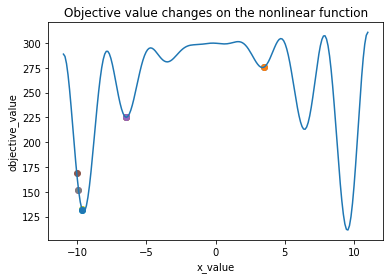

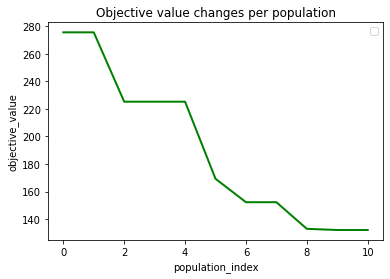

In [9]:
# I. Best chromosomes selection, crossover & mutation operations (2nd population until the last population), result presentation

for i in range(num_of_population):

  if i == 0:
    continue  

  print('------------------------------------------------------------------')
  print('population',i)
  print('------------------------------------------------------------------')

  # Store chromosomes and objective_values of current population into prev_population and prev_objective_value
  # before performing crossover and mutation operators
  prev_population = []
  prev_objective_value = []
  temp_objective_value = []  # For selecting the best chromosomes before crossover
  for j in range(population_size):
    prev_population += [population[j]]
    prev_objective_value += [objective_value[j]]
    temp_objective_value += [objective_value[j]]

  # Reset chromosomes and objective_values for the new population
  population = []
  objective_value = []

  # Select best chromosomes
  for j in range(num_of_selected_initial_chromosomes):
    min_value = float('inf')
    selected_index = -1
    for k in range(population_size):
      if temp_objective_value[k] < min_value:
        # Skip storing solution if the same solution has been stored before
        same_chromosome = 0
        for l in range(len(objective_value)):
          if temp_objective_value[k] == objective_value[l]:
            same_chromosome = 1
            for m in range(len(population[l])):
              if prev_population[k][m] != population[l][m]:
                same_chromosome = 0
                break
            if same_chromosome == 1:
              break
        if same_chromosome == 1:
          continue
        min_value = temp_objective_value[k]
        selected_index = k
    temp_objective_value[selected_index] = float('inf')
    population += [prev_population[selected_index]]
    objective_value += [prev_objective_value[selected_index]]

  print()
  print('best chromosomes:')
  for j in range(len(population)):
    rounded_value_chromosome = []
    for k in population[j]:
      rounded_value_chromosome += [float("{:.2f}".format(k))] 
    print('chromosome',j,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[j])))


  # Perform crossover

  # Perform crossover if a random value is less than the crossover_rate; otherwise, copy the values from the parents 
  while len(population) < population_size:

    child1_chromosome = []
    child2_chromosome = []

    # Set selection probability for each parent
    # Chromosomes with smaller objective value (cost) must have higher selection probability
    total_inverse_of_objective_value = 0
    for j in range(num_of_selected_initial_chromosomes):
      total_inverse_of_objective_value += 1/objective_value[j]
    selection_probability_of_parents = list()
    accumulated_selection_probability_of_parents = list()
    temp_accumulated_value = 0
    for j in range(num_of_selected_initial_chromosomes):
        probability = (1/objective_value[j])/total_inverse_of_objective_value
        selection_probability_of_parents += [probability]
        accumulated_selection_probability_of_parents += [temp_accumulated_value + probability]
        temp_accumulated_value += probability
    accumulated_selection_probability_of_parents[num_of_selected_initial_chromosomes-1] = 1.0
    
    a_random_value = random.random()
    for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
        randomly_selected_parent1_ID = j
        parent1_chromosome = list()
        for k in range(len(population[randomly_selected_parent1_ID])):
            parent1_chromosome += [population[randomly_selected_parent1_ID][k]]
        parent1_objective_values = objective_value[randomly_selected_parent1_ID]
        if a_random_value > accumulated_selection_probability_of_parents[j]:
            break

    same_parent_ID_found = 1
    while same_parent_ID_found == 1:
        a_random_value = random.random()
        for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
            randomly_selected_parent2_ID = j
            parent2_chromosome = list()
            for k in range(len(population[randomly_selected_parent2_ID])):
                parent2_chromosome += [population[randomly_selected_parent2_ID][k]]
            parent2_objective_values = objective_value[randomly_selected_parent2_ID]
            if a_random_value > accumulated_selection_probability_of_parents[j]:
                break

        if randomly_selected_parent2_ID != randomly_selected_parent1_ID:  
            same_parent_ID_found = 0


    a_random_value = random.random()
    if a_random_value > crossover_rate:
      population += [parent1_chromosome]
      population += [parent2_chromosome]
      objective_value += [objective_value[randomly_selected_parent1_ID]]
      objective_value += [objective_value[randomly_selected_parent2_ID]]
    else:
      for j in range(chromosome_length):
        parent_chromosome_with_less_value = min(parent1_chromosome[j],parent2_chromosome[j])
        parent_chromosome_with_more_value = max(parent1_chromosome[j],parent2_chromosome[j])
        percentage = random.uniform(0,1)
        child1_chromosome += [parent_chromosome_with_less_value + (parent_chromosome_with_more_value - parent_chromosome_with_less_value) * percentage]
        child2_chromosome += [parent_chromosome_with_less_value + (parent_chromosome_with_more_value - parent_chromosome_with_less_value) * (1-percentage)]
      child1_objective_values = objective_value_calculation(child1_chromosome)
      child2_objective_values = objective_value_calculation(child2_chromosome)

      # Find two best chromosomes among parent and child chromosomes
      temp_objective_value_of_chromosomes = list()
      temp_chromosomes = [[-1 for x in range(chromosome_length)] for y in range(4)]
      index_of_chromosome = 0

      temp_objective_value_of_chromosomes += [parent1_objective_values]
      temp_chromosomes[0] = parent1_chromosome
      temp_objective_value_of_chromosomes += [parent2_objective_values]
      temp_chromosomes[1] = parent2_chromosome
      temp_objective_value_of_chromosomes += [child1_objective_values]
      temp_chromosomes[2] = child1_chromosome
      temp_objective_value_of_chromosomes += [child2_objective_values]
      temp_chromosomes[3] = child2_chromosome

      temp_best_objective_value_of_chromosomes = float('inf')
      for j in range(4):
          if temp_objective_value_of_chromosomes[j] < temp_best_objective_value_of_chromosomes:
              temp_best_objective_value_of_chromosomes = temp_objective_value_of_chromosomes[j]
              selected_temp_chromosome_ID = j
      population += [temp_chromosomes[selected_temp_chromosome_ID]]
      objective_value += [temp_objective_value_of_chromosomes[selected_temp_chromosome_ID]]
      temp_objective_value_of_chromosomes[selected_temp_chromosome_ID] = float('inf')

      temp_best_objective_value_of_chromosomes = float('inf')
      for j in range(4):
          if temp_objective_value_of_chromosomes[j] < temp_best_objective_value_of_chromosomes:
              temp_best_objective_value_of_chromosomes = temp_objective_value_of_chromosomes[j]
              selected_temp_chromosome_ID = j
      population += [temp_chromosomes[selected_temp_chromosome_ID]]
      objective_value += [temp_objective_value_of_chromosomes[selected_temp_chromosome_ID]]

  print()
  print('population (after crossover):')
  for j in range(population_size):
    rounded_value_chromosome = []
    for k in population[j]:
      rounded_value_chromosome += [float("{:.2f}".format(k))] 
    print('chromosome',j,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[j])))

  
  # Perform mutation

  # Perform mutation if a random value is less than the mutation_rate; otherwise, copy the values from the parents 
  for l in range(population_size):

    child_chromosome = []

    # Set selection probability for each parent
    # Chromosomes with smaller objective value (cost) must have higher selection probability
    total_inverse_of_objective_value = 0
    for j in range(num_of_selected_initial_chromosomes):
      total_inverse_of_objective_value += 1/objective_value[j]
    selection_probability_of_parents = list()
    accumulated_selection_probability_of_parents = list()
    temp_accumulated_value = 0
    for j in range(num_of_selected_initial_chromosomes):
        probability = (1/objective_value[j])/total_inverse_of_objective_value
        selection_probability_of_parents += [probability]
        accumulated_selection_probability_of_parents += [temp_accumulated_value + probability]
        temp_accumulated_value += probability
    accumulated_selection_probability_of_parents[num_of_selected_initial_chromosomes-1] = 1.0
    
    a_random_value = random.random()
    for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
        randomly_selected_parent_ID = j
        parent_chromosome = list()
        for k in range(len(population[randomly_selected_parent_ID])):
            parent_chromosome += [population[randomly_selected_parent_ID][k]]
        parent_objective_value = objective_value[randomly_selected_parent_ID]
        if a_random_value > accumulated_selection_probability_of_parents[j]:
            break

    a_random_value = random.random()
    if a_random_value > mutation_rate:
      population += [parent_chromosome]
      objective_value += [objective_value[randomly_selected_parent_ID]]
    else:
      for j in range(chromosome_length):
        child_chromosome += [random.uniform(-11,11)]

      child_objective_value = objective_value_calculation(child_chromosome)

      # Store the best chromosome among parent and child chromosomes
      if parent_objective_value < child_objective_value:
        population += [parent_chromosome]
        objective_value += [objective_value[randomly_selected_parent_ID]]
      else:
        population += [child_chromosome]
        objective_value += [child_objective_value]

  print()
  print('population (after mutation):')
  for j in range(population_size):
    rounded_value_chromosome = []
    for k in population[j]:
      rounded_value_chromosome += [float("{:.2f}".format(k))] 
    print('chromosome',j,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[j])))
  print()
  print()


  # Find the best solution with the least objective value
  min_objective_value =  float('inf')
  selected_index = -1
  for k in range(population_size):
    if objective_value[k] < min_objective_value:
      min_objective_value = objective_value[k]
      selected_index = k

  # Store the best solution and the least objective value
  best_chromosomes += [population[selected_index]]
  best_objective_values += [objective_value[selected_index]]


print('Best solutions in each population:')
for j in range(len(best_objective_values)):
  rounded_value_chromosome = []
  for k in best_chromosomes[j]:
    rounded_value_chromosome += [float("{:.2f}".format(k))] 
  print('best_chromosome',j,'= ',rounded_value_chromosome,'; best_objective_value =',str("{:.2f}".format(best_objective_values[j])))

print()

# Figure generation
x = np.linspace(start=-11, stop=11, num=200)
plot1 = plt.plot(x, fitness(x))
for j in range(len(best_objective_values)):
  plt.scatter(best_chromosomes[j][0],best_objective_values[j])
plt.title('Objective value changes on the nonlinear function')
plt.xlabel("x_value")
plt.ylabel("objective_value")
print()

plot_x = list()
for i in range(len(best_objective_values)):
    plot_x += [i]
fig, data = plt.subplots()
data.plot(plot_x, best_objective_values, color='green', linewidth=2)
leg = data.legend();
data.xaxis.set_major_locator(MaxNLocator(integer=True))
data.set_title('Objective value changes per population')
plt.xlabel("population_index")
plt.ylabel("objective_value")

plt.show()